### CDO Structure
* The CDO consists of tranches
* Valuation performed using Monte Carlo Simulation (10,000 simulations)
* Each simulation is CDO using 10 bonds described below

In [37]:
import numpy as np
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt

In [32]:
num_simulations = 10000
num_periods = 60
face_value = 100000
coupon_rate = 0.07
recovery_rate = 0.4
correlation = 0.25
copula_params = 2.0  # Clayton copula parameter
risk_free_rate = 0.035  # 3.5%
num_bonds = 10
k = 0.1  # Mean reversion parameter
mean = 0.05  # Mean of the shocks
sigma = 0.02  # Assumed standard deviation of the shocks

In [33]:
def simulate_default_probabilities(num_bonds, num_simulations, num_periods, correlation, copula_params):
    # Generate independent standard normal random variables
    independent_normals = np.random.normal(size=(num_simulations, num_bonds, num_periods))

    # Generate correlated random variables using the Clayton copula
    correlated_normals = copula_transform(independent_normals, correlation, copula_params)

    # Transform correlated normals to uniform marginals
    uniform_marginals = norm.cdf(correlated_normals)

    # Simulate default probabilities based on the uniform marginals
    default_probabilities = 1 - uniform_marginals

    return default_probabilities

def copula_transform(normals, rho, copula_params):
    """
    Clayton copula transformation function.
    """
    num_columns = normals.shape[2]
    print(num_columns)
    transformed_variables = np.empty_like(normals)

    for i in range(num_columns-1):
        u = normals[:,:, i]
        v = normals[:,:, i + 1] if i + 1 < num_columns else normals[:,:, 0]  # Wrap around to the first column for the last variable

        # Clayton copula transformation formula
        w = (u**(-rho) + v**(-rho) - 1)**(-1/rho)

        transformed_variables[:,:, i] = u
        transformed_variables[:,:, i + 1] = w if i + 1 < num_columns else w  # Wrap around

    return transformed_variables



In [4]:

default_probabilities = simulate_default_probabilities(num_bonds, num_simulations, num_periods, correlation, copula_params)

# Print the first 5 simulated default probabilities for each period
print("Simulated Default Probabilities:")
print(default_probabilities[:1, :,:])
print(default_probabilities.shape)

60


/var/folders/xc/6c2pzz2172x4x83lp41y7csm0000gn/T/ipykernel_2452/2381541489.py:29: RuntimeWarning: invalid value encountered in power
  w = (u**(-rho) + v**(-rho) - 1)**(-1/rho)


Simulated Default Probabilities:
[[[0.77120567 0.28626906 0.04669569 0.94319302 0.66701743 0.02103497
   0.15124642 0.45394518 0.11620557 0.72555621 0.60850336 0.04374477
   0.85453802 0.94774622 0.03831739 0.73960696 0.18465116 0.65159195
   0.48041559 0.91856992 0.52254859 0.28597141 0.13709205 0.80857181
   0.69400461 0.21531407 0.54115071 0.28952028 0.03747426 0.60311479
   0.08632797 0.39291264 0.50471996 0.10479988 0.49407859 0.54636854
   0.34239563 0.72488474 0.67077986 0.47995433 0.48991175 0.91364721
   0.93481105 0.6359764  0.52637506 0.13015477 0.29047032 0.12503996
   0.37885893 0.69959183 0.66907324 0.06076848 0.50193381 0.00546654
   0.34584135 0.0184517  0.55297855 0.84441423 0.15580858 0.32166196]
  [0.7278473  0.60883139 0.31215282 0.4970673  0.03510636 0.41496732
   0.25942961 0.36246852 0.55635285 0.00276201 0.75548104 0.53668155
   0.401013   0.827304   0.28955574 0.04099427 0.01186569 0.31603518
   0.97090205 0.02620617 0.94819389 0.47155982 0.10338215 0.58928144


In [5]:
def generate_default_scenarios(default_probabilities):
    """
    Generate default scenarios based on simulated default probabilities.
    """
    num_simulations, num_bonds, num_periods = default_probabilities.shape

    # Compare default probabilities to determine defaults
    default_scenarios = 0.9 < default_probabilities

    return default_scenarios

In [6]:
default_scenarios = generate_default_scenarios(default_probabilities)

In [7]:
# Print the first 5 default scenarios for each period
print("Default Scenarios:")
print(default_scenarios[:1,:, :].astype(int))
print(default_scenarios.shape)

Default Scenarios:
[[[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
   0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
   0 0 0 1 0 0 0 0 

In [8]:
def first_one(A):
    if len(A) == 0:
        return -1

    return first_one_subarray(A, 0, len(A) - 1)

def first_one_subarray(A, start, end):
    # Incorrect subarray
    if start > end or start > len(A) - 1:
        return -1

    # Check if 1 is on 'first' position
    if A[start] == 1:
        return start

    # Divide into two parts
    split_point = max(start + 1, round(end / 2))
    result_left = first_one_subarray(A, start + 1, split_point)
    result_right = first_one_subarray(A, split_point + 1, end)

    if result_left != -1:
        return result_left
    else:
        return result_right

In [9]:
default_times = np.zeros((num_simulations,num_bonds,num_periods ))
for i in range(num_simulations):
    for j in range(num_bonds):
        default_times[i,j,:]=first_one(default_scenarios[i,j,:])

In [10]:
# Initialize CDO values
cdo_values = np.zeros(num_simulations)

In [11]:
cdo_values.shape

(10000,)

In [12]:
default_scenarios.shape

(10000, 10, 60)

In [13]:
def calculate_cdo_cash_flows(default_scenarios, face_value, coupon_rate, recovery_rate):
    """
    Calculate CDO cash flows based on default scenarios.
    """
    num_simulations,num_bonds, num_periods = default_scenarios.shape

    # Initialize CDO cash flows matrix
    cdo_cash_flows = np.zeros((num_simulations,num_bonds, num_periods))
    #print(cdo_cash_flows[1,:])
    i=0
    for t in range(num_simulations):
        # For each Bond
        for b in range(num_bonds):
            # Calculate cash flows for each simulation at time t
            flag=True
            i=0
            for i in range(num_periods):
                #print(flag)
                if flag:
                    if default_scenarios[t,b, i] > 0.9:  # Bond defaulted
                        cdo_cash_flows[t,b, i] = face_value * (1 - recovery_rate)  # Loss given default
                        flag = False
                    else:  # Bond did not default
                        cdo_cash_flows[t,b, i] = face_value * coupon_rate / 2  # 6-month coupon payment

    return cdo_cash_flows

In [14]:
cdo_cash_flows = calculate_cdo_cash_flows(default_scenarios, face_value, coupon_rate, recovery_rate)

# Print the first 5 rows of the calculated CDO cash flows
print("CDO Cash Flows:")
print(cdo_cash_flows[:1, :])

CDO Cash Flows:
[[[ 3500.  3500.  3500. 60000.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
  [ 3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
    3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500. 60000.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
  [ 3500.  3500.  3500. 60000.     0.     0.     0.     0.     0.     0.
       0.     0.     0.     0.   

In [15]:
def cash_flows_per_period_func(cdo_cash_flows):
    
    num_simulations,num_bonds, num_periods = cdo_cash_flows.shape
    cash_flows_per_period=np.zeros((num_simulations,1, num_periods))
    cash_flows_per_period = np.sum(cdo_cash_flows,axis=1)
    return cash_flows_per_period

In [16]:
cash_flows_per_period = cash_flows_per_period_func(cdo_cash_flows)
cash_flows_per_period.shape

(10000, 60)

In [17]:
cash_flows_per_period[1]

array([91500., 88000., 28000., 84500., 24500., 81000., 77500., 74000.,
       14000., 70500., 10500., 10500., 10500., 10500., 10500., 67000.,
        7000.,  7000., 63500.,  3500.,  3500.,  3500.,  3500.,  3500.,
       60000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.])

In [127]:
def discount_cash_flows(cash_flows_per_period, risk_free_rate):
    """
    Discount CDO cash flows to present value using the risk-free rate.
    """
    num_simulations, num_periods = cash_flows_per_period.shape

    # Initialize discounted cash flows matrix
    discounted_cash_flows = np.zeros((num_simulations, num_periods))
    for t in range(num_periods):
        discount_factor = 1 / (1 + risk_free_rate / 2) ** (t + 1)  # 6-month compounding

        # Discount cash flows for each simulation at time t
        discounted_cash_flows[:, t] = cash_flows_per_period[:, t] * discount_factor

    return discounted_cash_flows

In [128]:
discounted_cash_flows = discount_cash_flows(cash_flows_per_period, risk_free_rate)

In [20]:
# Print the first 5 rows of the discounted cash flows
print("Discounted Cash Flows:")
print(discounted_cash_flows[1, :])

Discounted Cash Flows:
[89926.28992629 84999.00391792 26579.98782334 78834.99371963
 22464.35713628 72992.5458773  68637.39261068 64410.45640885
 11976.17889267 59271.3662291   8675.82338028  8526.60774475
  8379.9584715   8235.83142162  8094.18321535 50760.29254042
  5212.1023548   5122.45931676 45668.81946147  2473.88602008
  2431.33761188  2389.52099447  2348.42358179  2308.03300422
 38885.77894084     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.        ]


In [21]:
discounted_cash_flows.shape

(10000, 60)

In [22]:
for i in range(num_simulations):
    cdo_values[i] = np.sum(discounted_cash_flows[i,:])

In [23]:
cdo_values.shape

(10000,)

In [24]:
cdo_values[:5]

array([822458.05566537, 779605.6306023 , 738072.47362354, 856454.88941471,
       745962.57082652])

In [25]:
expected_cdo_value = np.mean(cdo_values)

In [26]:
expected_cdo_value

778988.0316943354

In [27]:
cdo_values

array([822458.05566537, 779605.6306023 , 738072.47362354, ...,
       888051.25939099, 748362.06741877, 759472.14652202])

In [28]:
discounted_cash_flows

array([[ 34398.03439803,  33806.42201281,  86859.60306556, ...,
             0.        ,      0.        ,      0.        ],
       [ 89926.28992629,  84999.00391792,  26579.98782334, ...,
             0.        ,      0.        ,      0.        ],
       [ 89926.28992629,  84999.00391792,  80214.60610972, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [ 34398.03439803,  88379.6461192 ,  83537.10458764, ...,
             0.        ,      0.        ,      0.        ],
       [ 34398.03439803,  33806.42201281, 140494.22135194, ...,
             0.        ,      0.        ,      0.        ],
       [ 34398.03439803,  88379.6461192 , 137171.72287402, ...,
             0.        ,      0.        ,      0.        ]])

### Defining the Tranches 
- We have a total notional of 10*100,000 = 1,000,000
- Equity Tranche - Notional -  Remainder
- Mezzanine Tranche - Notional - \$350,000
    - Coupon = 3\% 
- Senior Tranche - Notional - $450,000
    - Coupon = 2%

In [49]:
# Defining and Calculating parameters for the tranches 
sr_tranche = 450000
sr_cpn = 0.02 # per year
sr_cpn_pay = sr_tranche*sr_cpn/4
jr_tranche = 350000
jr_cpn = 0.03 # per year 
jr_cpn_pay = jr_tranche*jr_cpn/4

In [50]:
print(sr_cpn_pay)
print(jr_cpn_pay)

2250.0
2625.0


In [105]:
sr_tranche_term = np.zeros(60)
jr_tranche_term = np.zeros(60)
for i in range(59):
    sr_tranche_term[i]=sr_cpn_pay
    jr_tranche_term[i]=jr_cpn_pay
sr_tranche_term[59]=sr_tranche
jr_tranche_term[59]=jr_tranche

In [123]:
jr_tranche_term

array([  2625.,   2625.,   2625.,   2625.,   2625.,   2625.,   2625.,
         2625.,   2625.,   2625.,   2625.,   2625.,   2625.,   2625.,
         2625.,   2625.,   2625.,   2625.,   2625.,   2625.,   2625.,
         2625.,   2625.,   2625.,   2625.,   2625.,   2625.,   2625.,
         2625.,   2625.,   2625.,   2625.,   2625.,   2625.,   2625.,
         2625.,   2625.,   2625.,   2625.,   2625.,   2625.,   2625.,
         2625.,   2625.,   2625.,   2625.,   2625.,   2625.,   2625.,
         2625.,   2625.,   2625.,   2625.,   2625.,   2625.,   2625.,
         2625.,   2625.,   2625., 350000.])

In [109]:
def distribute_cash_flows(cash_flows_per_period, sr_tranche, jr_tranche):
    """
    Distribute cash flows among senior and junior tranches.
    """
    num_simulations, num_periods = cash_flows_per_period.shape

    # Initialize cash flows matrices for senior and junior tranches
    sr_cash_flows = np.zeros(shape=(num_simulations, num_periods))
    jr_cash_flows = np.zeros(shape=(num_simulations, num_periods))
    residuals = np.zeros(shape=(num_simulations, num_periods))

    for t in range(num_simulations):
        for i in range(num_periods):
            if cash_flows_per_period[t,i] > 0:
                sr_cash_flows[t,i]=min(cash_flows_per_period[t,i], sr_tranche[i])
                jr_cash_flows[t,i]=min(cash_flows_per_period[t,i]-sr_cash_flows[t,i], jr_tranche[i])
                residuals[t,i] = max(0,cash_flows_per_period[t,i]- sr_cash_flows[t,i]-jr_cash_flows[t,i])
    #print(residuals)
    return sr_cash_flows, jr_cash_flows, residuals

In [110]:
sr_cash_flows, jr_cash_flows, residuals = distribute_cash_flows(cash_flows_per_period,sr_tranche_term, jr_tranche_term)

In [111]:
sr_cash_flows[1]

array([2250., 2250., 2250., 2250., 2250., 2250., 2250., 2250., 2250.,
       2250., 2250., 2250., 2250., 2250., 2250., 2250., 2250., 2250.,
       2250., 2250., 2250., 2250., 2250., 2250., 2250.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.])

In [112]:
jr_cash_flows[1]

array([2625., 2625., 2625., 2625., 2625., 2625., 2625., 2625., 2625.,
       2625., 2625., 2625., 2625., 2625., 2625., 2625., 2625., 2625.,
       2625., 1250., 1250., 1250., 1250., 1250., 2625.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.])

In [113]:
residuals[1]

array([86625., 83125., 23125., 79625., 19625., 76125., 72625., 69125.,
        9125., 65625.,  5625.,  5625.,  5625.,  5625.,  5625., 62125.,
        2125.,  2125., 58625.,     0.,     0.,     0.,     0.,     0.,
       55125.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.])

### Discounting the values of Tranches

In [129]:
discounted_sr = discount_cash_flows(sr_cash_flows, risk_free_rate)
discounted_jr = discount_cash_flows(jr_cash_flows, risk_free_rate)
discounted_resd = discount_cash_flows(residuals, risk_free_rate)

In [130]:
discounted_sr[1]

array([2211.3022113 , 2173.26998654, 2135.89187866, 2099.1566375 ,
       2063.05320639, 2027.57071881, 1992.69849515, 1958.42603946,
       1924.74303632, 1891.63934774, 1859.10501006, 1827.13023102,
       1795.70538675, 1764.82101892, 1734.46783186, 1704.63668979,
       1675.31861404, 1646.50478039, 1618.18651635, 1590.35529863,
       1563.00275049, 1536.1206393 , 1509.70087401, 1483.73550271,
       1458.21671028,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.     

In [116]:
discounted_jr[1]

array([2579.85257985, 2535.48165096, 2491.87385844, 2449.01607709,
       2406.89540746, 2365.49917195, 2324.81491101, 2284.83037937,
       2245.53354238, 2206.91257236, 2168.95584507, 2131.65193619,
       2094.98961788, 2058.95785541, 2023.54580384, 1988.74280476,
       1954.53838305, 1920.92224379, 1887.88426908,  883.53072146,
        868.33486138,  853.40035517,  838.72270778,  824.29750151,
       1701.25282866,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.     

In [149]:
discounted_resd[1]

array([85135.13513514, 80290.25228042, 21952.22208624, 74286.82100503,
       17994.40852243, 68599.47598653, 64319.87920452, 60167.19999002,
        7805.90231397, 55172.814309  ,  4647.76252515,  4567.82557755,
        4489.26346688,  4412.0525473 ,  4336.16957965, 47066.91304587,
        1582.24535771,  1555.03229259, 42162.74867604,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
       35726.3094019 ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
      

In [131]:
sr_values = np.zeros(num_simulations)
jr_values = np.zeros(num_simulations)
resd_values = np.zeros(num_simulations)

for i in range(num_simulations):
    sr_values[i] = np.sum(discounted_sr[i,:])
    jr_values[i] = np.sum(discounted_jr[i,:])
    resd_values[i] = np.sum(discounted_resd[i,:])

In [132]:
sr_value = np.mean(sr_values)
jr_value = np.mean(jr_values)
residual_value = np.mean(resd_values)

In [133]:
sr_value

48598.260299692556

In [134]:
jr_value

49255.23752351677

In [135]:
residual_value

681134.5338711261

### Simulating Yeild to Maturity 

In [29]:
def simulate_ytm(num_simulations, num_periods, face_value, coupon_rate, recovery_rate, correlation, copula_params, risk_free_rate, num_bonds, k, mean, sigma):
    # Initialize arrays to store results
    ytms = np.zeros((num_simulations, num_periods))
    
    # Generate random shocks
    shocks = np.random.normal(0, sigma, (num_simulations, num_periods))
    
    # Initialize YTM with risk-free rate
    ytms[:, 0] = risk_free_rate
    
    for t in range(1, num_periods):
        # Calculate next YTM using the model
        ytms[:, t] = ytms[:, t - 1] + k * (mean - ytms[:, t - 1]) + sigma * shocks[:, t]
    
    return ytms

In [161]:
k=0.2
mean = 0.00  # Mean of the shocks
sigma = 0.15  # Assumed standard deviation of the shocks
ytms = simulate_ytm(5, num_periods, face_value, coupon_rate, recovery_rate, correlation, copula_params, risk_free_rate, num_bonds, k, mean, sigma)



In [162]:
def plot_ytms(ytms):
    num_simulations, num_periods = ytms.shape
    plt.figure(figsize=(10, 6))
    for i in range(num_simulations):
        plt.plot(range(1, num_periods + 1), ytms[i], alpha=0.5)
    plt.title('Simulated Yield to Maturity (YTM) Over Time')
    plt.xlabel('Period')
    plt.ylabel('Yield to Maturity (YTM)')
    plt.grid(True)
    plt.show()

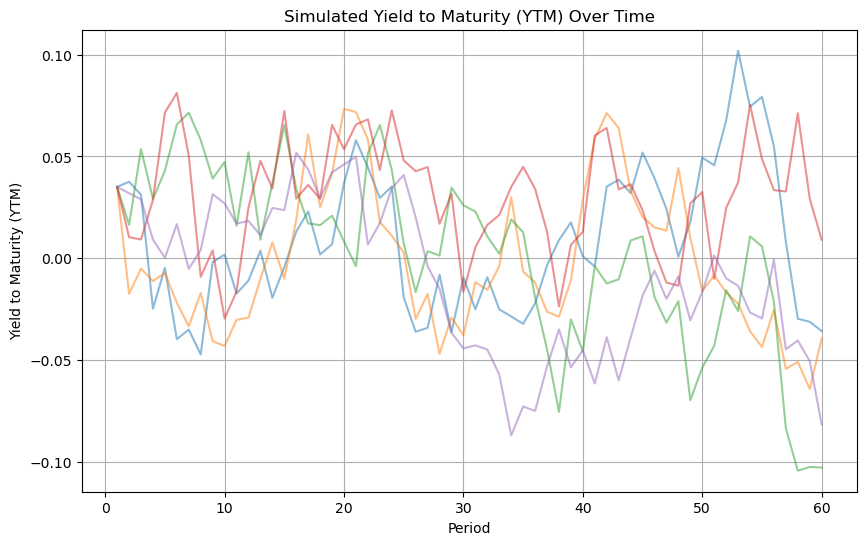

In [163]:
plot_ytms(ytms[:5])

In [140]:
ytms

array([[ 0.035     ,  0.00467868,  0.00577712, ...,  0.06191871,
         0.02046599,  0.01086962],
       [ 0.035     ,  0.04838229,  0.0506224 , ...,  0.03595742,
         0.05276289,  0.04925244],
       [ 0.035     ,  0.05254475,  0.05565244, ...,  0.009359  ,
         0.02577818,  0.01376303],
       ...,
       [ 0.035     ,  0.08358448,  0.04665991, ..., -0.05257171,
        -0.03769342, -0.01618555],
       [ 0.035     ,  0.01803368,  0.00949139, ...,  0.02432992,
         0.01676457,  0.02131659],
       [ 0.035     , -0.0077785 , -0.01903205, ...,  0.02855652,
         0.02233769,  0.02122072]])

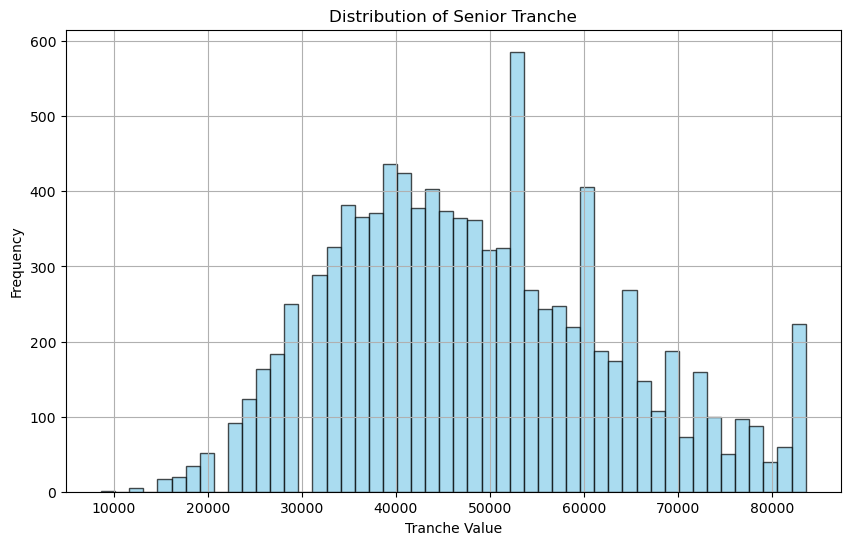

In [155]:
plt.figure(figsize=(10, 6))
plt.hist(sr_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Senior Tranche')
plt.xlabel('Tranche Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

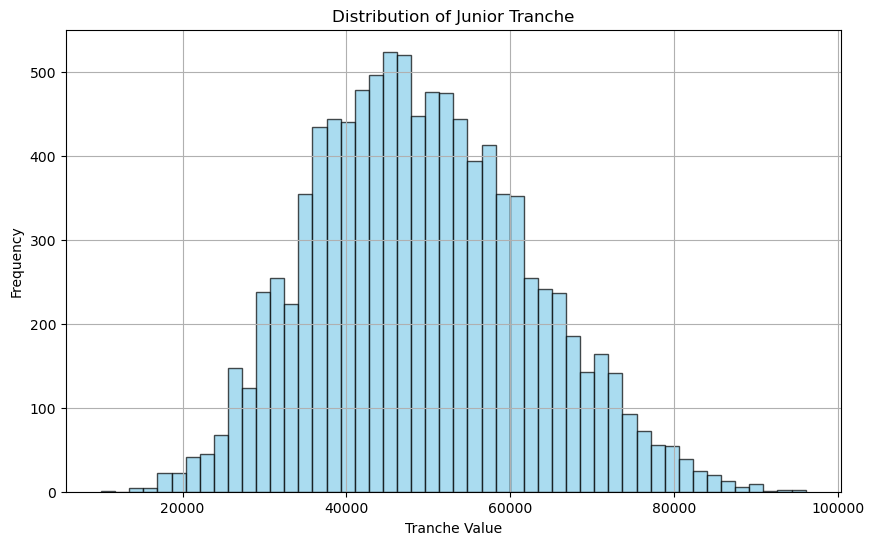

In [156]:
plt.figure(figsize=(10, 6))
plt.hist(jr_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Junior Tranche')
plt.xlabel('Tranche Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

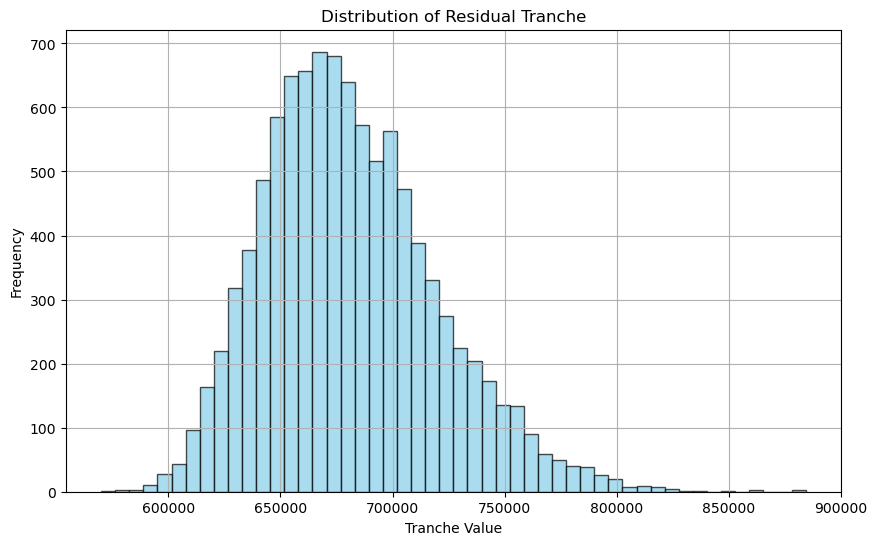

In [157]:

plt.figure(figsize=(10, 6))
plt.hist(resd_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residual Tranche')
plt.xlabel('Tranche Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [196]:
def discount_cash_flows_with_ytm(tranche_cash_flows_per_period, ytm):
    """
    Discount CDO cash flows to present value using the risk-free rate.
    """
    num_simulations, num_periods = tranche_cash_flows_per_period.shape

    # Initialize discounted cash flows matrix
    discounted_cash_flows = np.zeros((num_simulations, num_periods))
    for t in range(num_periods):
        discount_factor = 1 / (1 + ytm[t] / 2) ** (t + 1)  # 6-month compounding

        # Discount cash flows for each simulation at time t
        discounted_cash_flows[:, t] = tranche_cash_flows_per_period[:, t] * discount_factor

    return discounted_cash_flows

In [199]:
sr_cf_discounted_ytm=discount_cash_flows_with_ytm(sr_cash_flows, ytm)
jr_cf_discounted_ytm=discount_cash_flows_with_ytm(jr_cash_flows, ytm)
resid_cf_discounted_ytm=discount_cash_flows_with_ytm(residuals, ytm)

In [200]:
sr_values_ytm = np.sum(sr_cf_discounted_ytm)
jr_values_ytm = np.sum(jr_cf_discounted_ytm)
resid_values_ytm = np.sum(resid_cf_discounted_ytm)

In [203]:
sr_values_ytm = np.zeros(num_simulations)
jr_values_ytm = np.zeros(num_simulations)
resd_values_ytm = np.zeros(num_simulations)

for i in range(num_simulations):
    sr_values_ytm[i] = np.sum(sr_cf_discounted_ytm[i,:])
    jr_values_ytm[i] = np.sum(jr_cf_discounted_ytm[i,:])
    resd_values_ytm[i] = np.sum(resid_cf_discounted_ytm[i,:])

In [204]:
sr_values_ytm

array([97468.97555787, 52481.72000599, 41615.47970576, ...,
       98566.63933257, 34099.25457052, 45304.44825895])

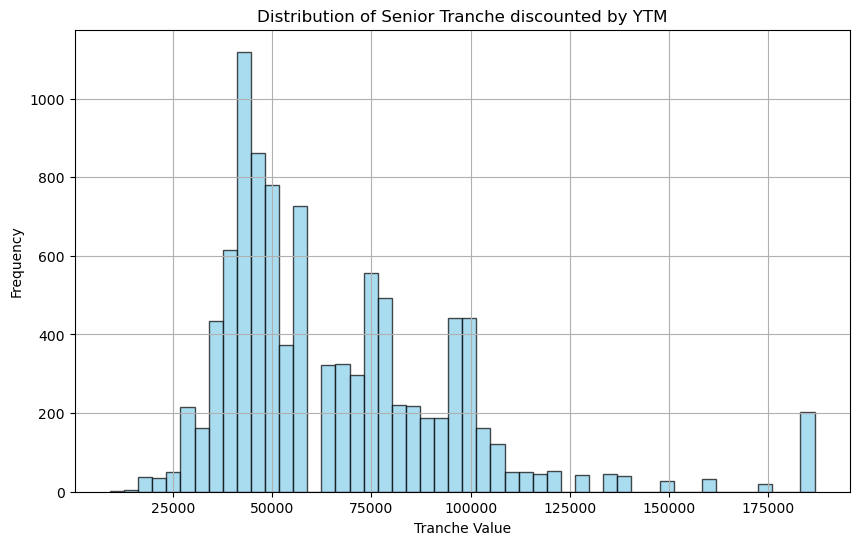

In [205]:

plt.figure(figsize=(10, 6))
plt.hist(sr_values_ytm, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Senior Tranche discounted by YTM')
plt.xlabel('Tranche Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

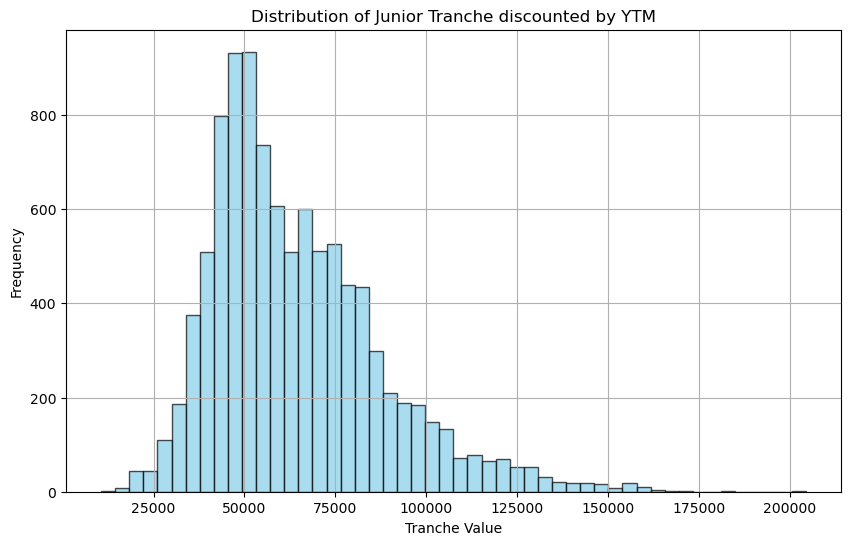

In [206]:
plt.figure(figsize=(10, 6))
plt.hist(jr_values_ytm, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Junior Tranche discounted by YTM')
plt.xlabel('Tranche Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

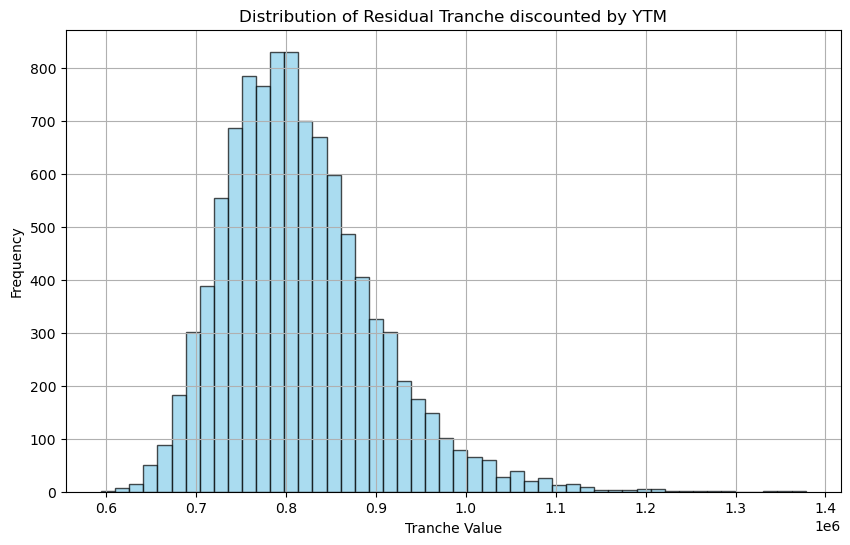

In [207]:
plt.figure(figsize=(10, 6))
plt.hist(resd_values_ytm, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residual Tranche discounted by YTM')
plt.xlabel('Tranche Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [212]:
confidence_level = 95
var = np.percentile(resd_values_ytm, 100 - confidence_level)
print(f"Value at Risk (VaR) for residuals at {confidence_level}% confidence level: {var}")

# Calculate Expected Shortfall (ES) at the same confidence level
def calculate_es(values, confidence_level):
    exceedances = values[values <= np.percentile(values, 100 - confidence_level)]
    return np.mean(exceedances)

es = calculate_es(resd_values_ytm, confidence_level)
print(f"Expected Shortfall (ES) for residuals at {confidence_level}% confidence level: {es}")

Value at Risk (VaR) for residuals at 95% confidence level: 696439.7352100696
Expected Shortfall (ES) for residuals at 95% confidence level: 676192.5819731241


In [213]:
confidence_level = 95
var = np.percentile(jr_values_ytm, 100 - confidence_level)
print(f"Value at Risk (VaR) for Senior Tranche at {confidence_level}% confidence level: {var}")

es = calculate_es(jr_values_ytm, confidence_level)
print(f"Expected Shortfall (ES) for Senior Tranche at {confidence_level}% confidence level: {es}")

Value at Risk (VaR) for Senior Tranche at 95% confidence level: 35045.52789744502
Expected Shortfall (ES) for Senior Tranche at 95% confidence level: 29966.320854793255


In [214]:
confidence_level = 95
var = np.percentile(sr_values_ytm, 100 - confidence_level)
print(f"Value at Risk (VaR) for Senior Tranche at {confidence_level}% confidence level: {var}")

es = calculate_es(sr_values_ytm, confidence_level)
print(f"Expected Shortfall (ES) for Senior Tranche at {confidence_level}% confidence level: {es}")

Value at Risk (VaR) for Senior Tranche at 95% confidence level: 31967.044276390836
Expected Shortfall (ES) for Senior Tranche at 95% confidence level: 27696.767099466582
